In [3]:
import pandas as pd
import pickle
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import pickle, joblib

# SCALE THE DATA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

#metrics
from sklearn.metrics import mean_squared_error


In [4]:
data=pd.read_csv(r"C:\Users\Tippu\Downloads\UCI_Credit_Card.csv\UCI_Credit_Card.csv")

data.info()
data.duplicated().sum() # no duplicates
data.isna().sum() # No missing values are present
data.describe() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
# replacing 0,6 in education to 5 

#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown)
data['EDUCATION'].unique()
data['EDUCATION'].replace([0,6],5,inplace=True)
data['EDUCATION'].unique()



# replaced 0 with 3 in marriage column 
data['MARRIAGE'].value_counts()
data['MARRIAGE'].replace(0,3,inplace=True)
data['MARRIAGE'].unique()




C:\Users\Tippu\AppData\Local\Temp\ipykernel_17844\737107741.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['EDUCATION'].replace([0,6],5,inplace=True)
C:\Users\Tippu\AppData\Local\Temp\ipykernel_17844\737107741.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

array([1, 2, 3], dtype=int64)

In [7]:
c1=data.select_dtypes(exclude=['float64']).columns
c2=data.select_dtypes(exclude=['int64']).columns
print(c1)
print(c2)

Index(['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month'],
      dtype='object')
Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [8]:
#seperating input and output  data variables

X=data.drop(['default.payment.next.month'],axis=1)
y=data['default.payment.next.month']

# categorical input variable 
x_categ_data=X.loc[:,'SEX':'MARRIAGE']
x_categ_data

x_numericdata=X.iloc[:,5:]
#numeric input variable

x_numericdata1=pd.concat([x_numericdata,X[['LIMIT_BAL']]],axis=1)
x_numericdata1
type(x_numericdata1['LIMIT_BAL'])


pandas.core.series.Series

In [9]:
transformed_data,lambda_value=yeojohnson(x_numericdata1['LIMIT_BAL'])
    
transformed_data


NameError: name 'yeojohnson' is not defined

In [10]:
# initialise the instance
encoder=OneHotEncoder()

# Assuming encoder is your instance of the encoder you want to use
encode_pipeline = Pipeline(steps=[('encoder', encoder)])

# Assuming x_categ_data is a DataFrame with columns 'SEX' and 'MARRIAGE'
columns_to_encode = ['SEX', 'MARRIAGE']

encode_transform = ColumnTransformer(transformers=[('encoders', encode_pipeline, columns_to_encode)])
encode = encode_transform.fit(x_categ_data[columns_to_encode])

# Use transform on the specified columns and get_feature_names_out to name the columns
encoded_data = pd.DataFrame(encode.transform(x_categ_data[columns_to_encode]),
                            columns=encode.get_feature_names_out(columns_to_encode))



##encoded categorical data 
x_categ_Final=pd.concat([x_categ_data,encoded_data],axis=1)
x_categ_Final.drop(['SEX','MARRIAGE'],inplace=True,axis=1)
x_categ_Final


,EDUCATION,encoders__SEX_1,encoders__SEX_2,encoders__MARRIAGE_1,encoders__MARRIAGE_2,encoders__MARRIAGE_3
0,2,0.0,1.0,1.0,0.0,0.0
1,2,0.0,1.0,0.0,1.0,0.0
2,2,0.0,1.0,0.0,1.0,0.0
3,2,0.0,1.0,1.0,0.0,0.0
4,2,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
29995,3,1.0,0.0,1.0,0.0,0.0
29996,3,1.0,0.0,0.0,1.0,0.0
29997,2,1.0,0.0,0.0,1.0,0.0
29998,3,1.0,0.0,1.0,0.0,0.0


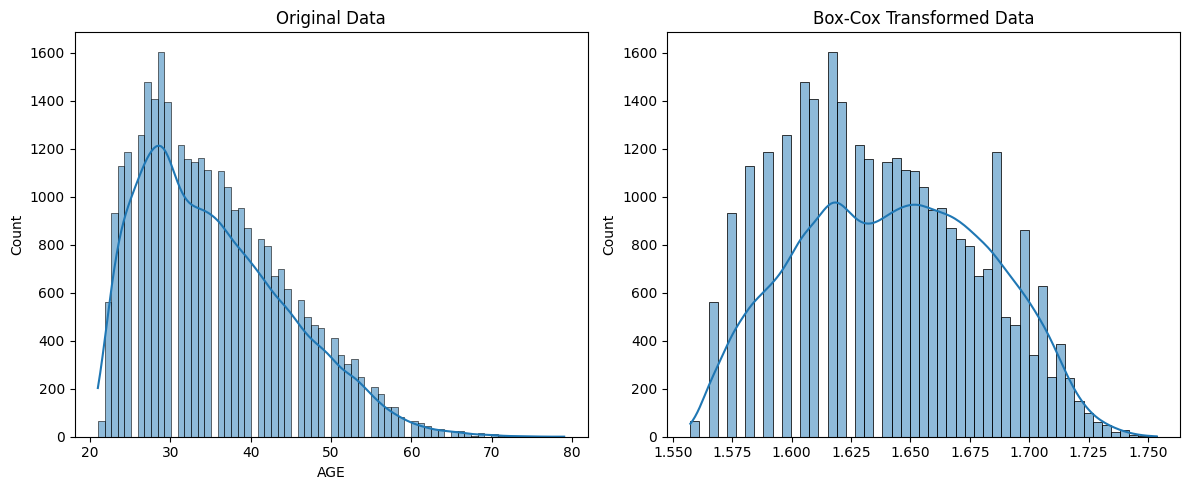

Optimal lambda value: -0.5089368514714119


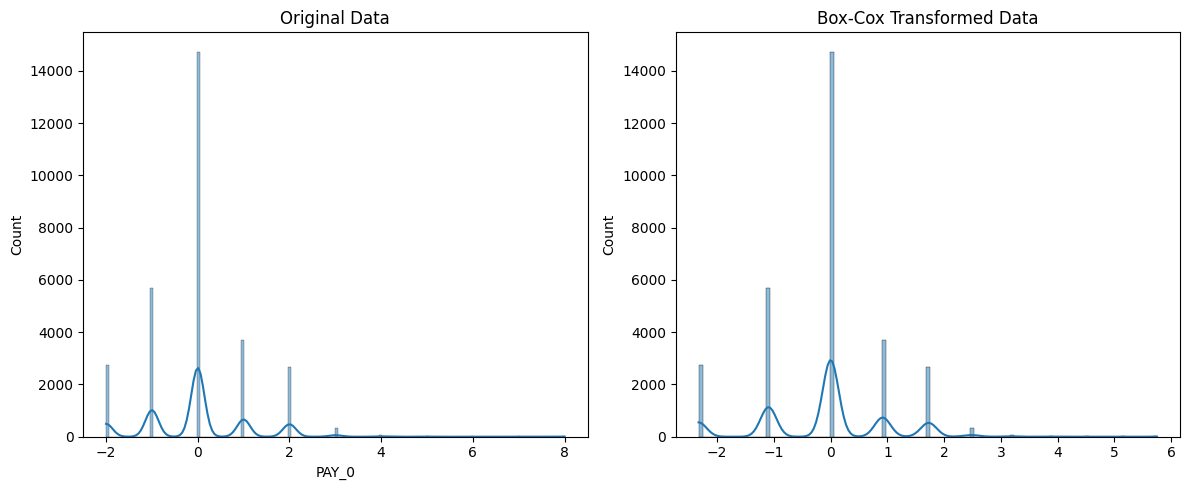

Optimal lambda value: 0.7699211703741685


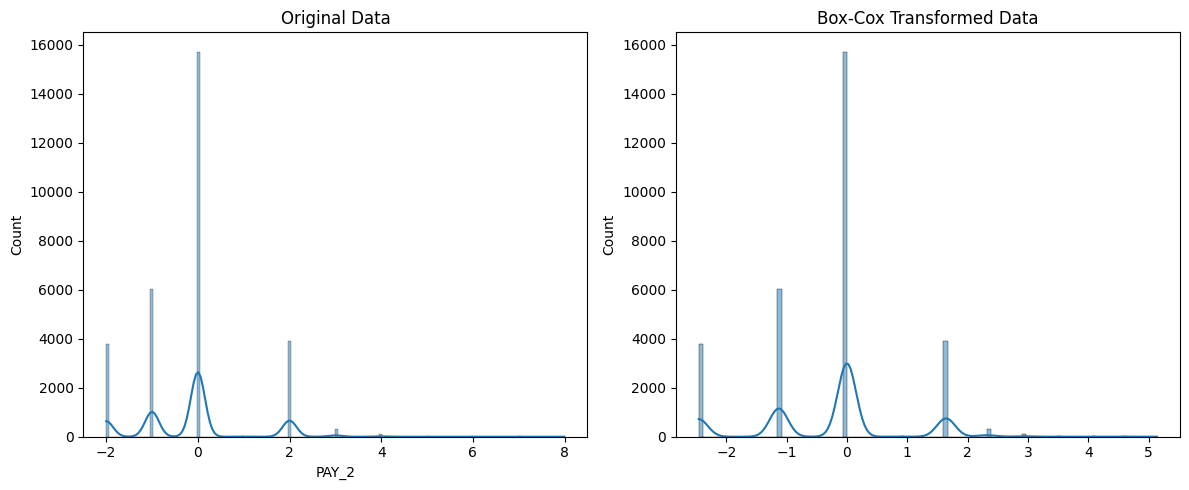

Optimal lambda value: 0.6885613381442474


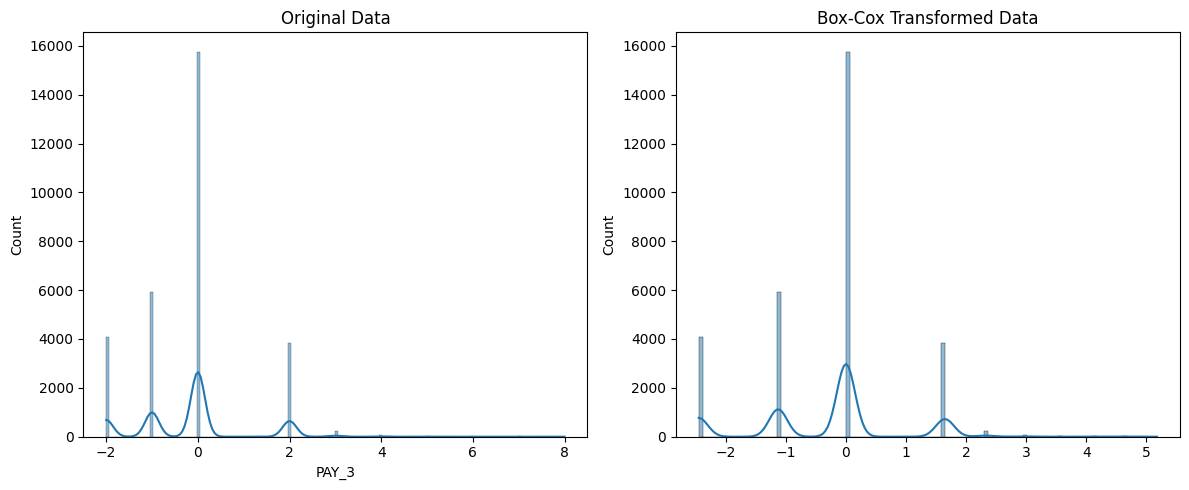

Optimal lambda value: 0.6936249375102246


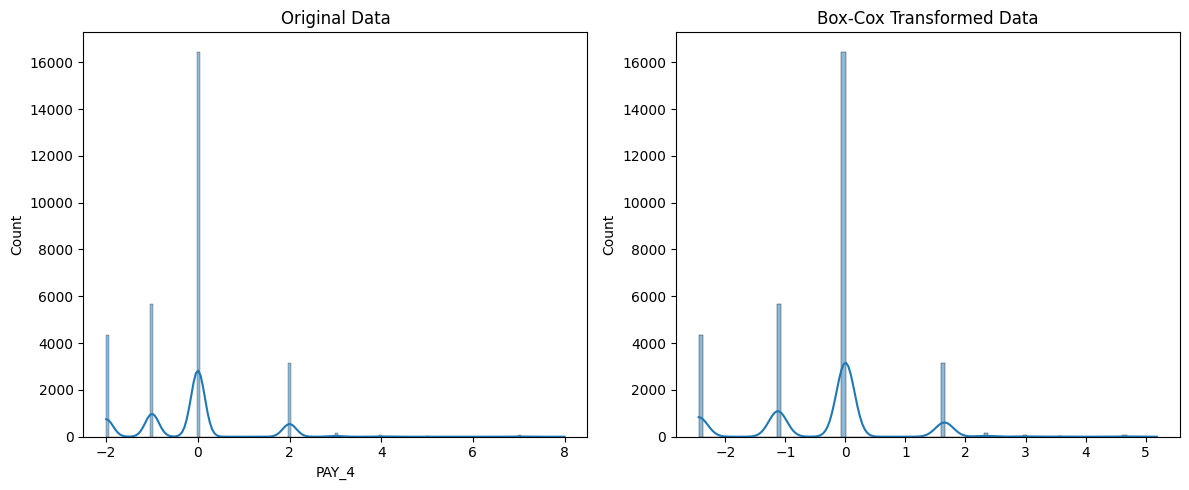

Optimal lambda value: 0.6958563873309482


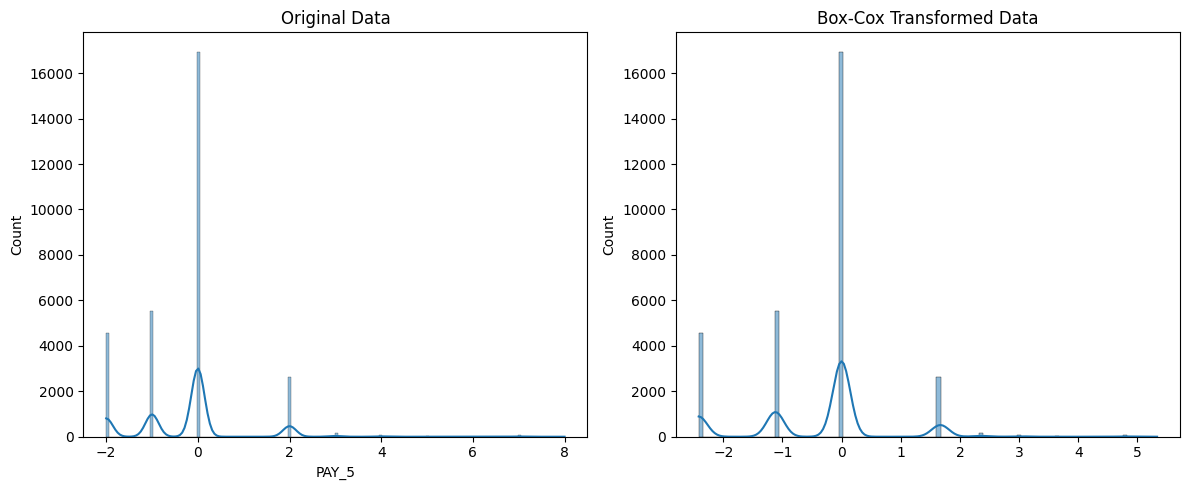

Optimal lambda value: 0.7152130997239842


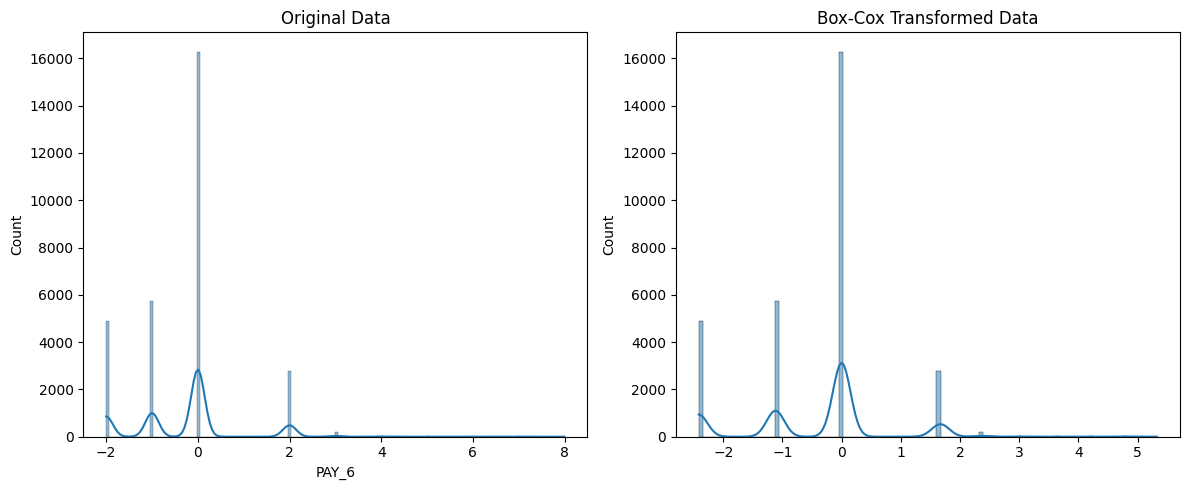

Optimal lambda value: 0.7146312943803947


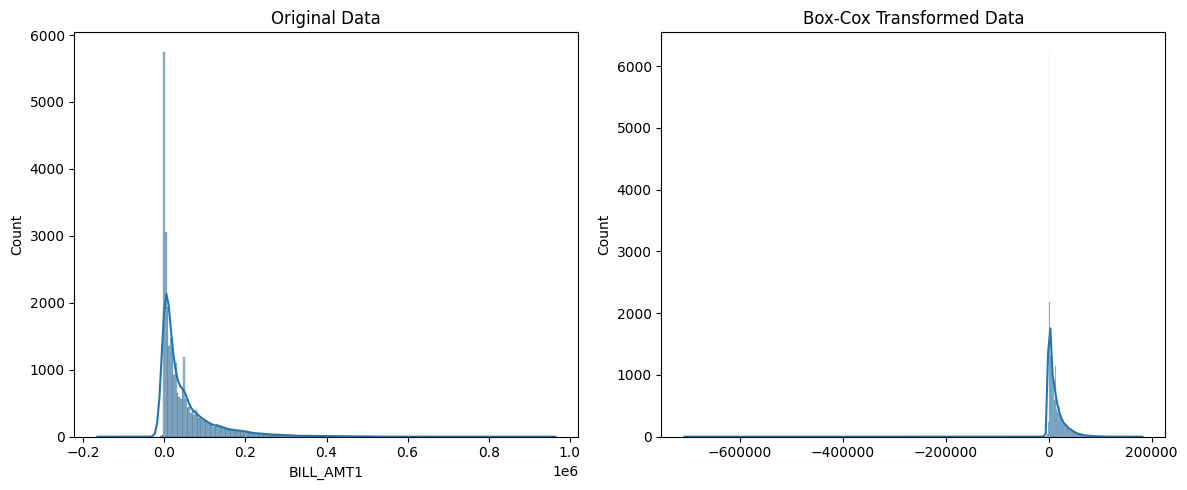

Optimal lambda value: 0.8688660700288563


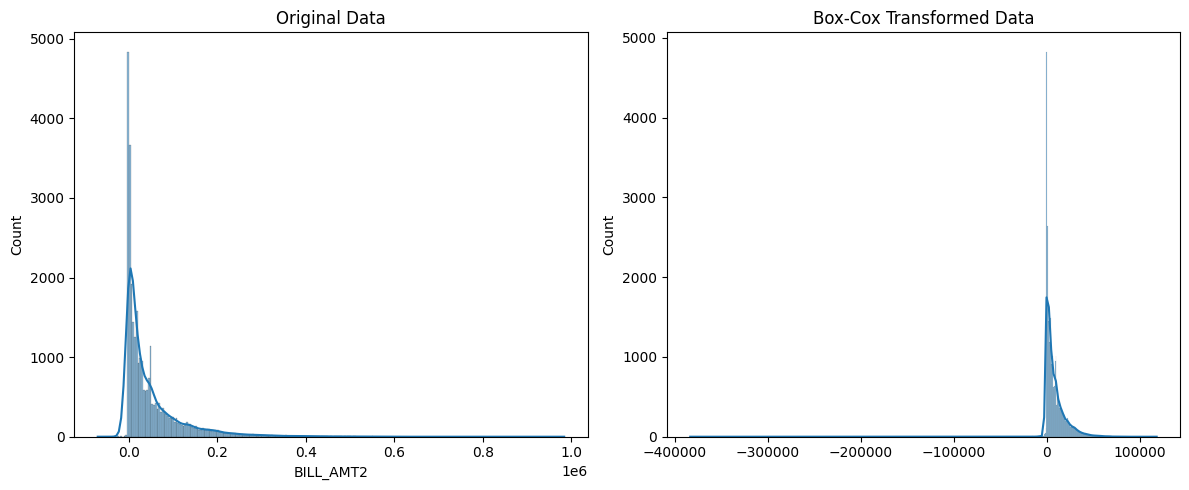

Optimal lambda value: 0.833374747569455


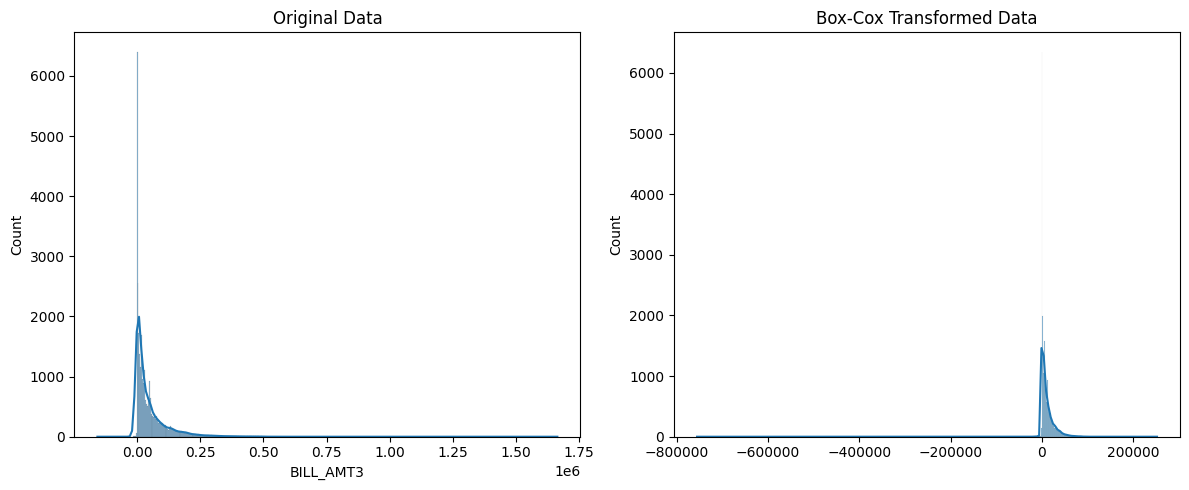

Optimal lambda value: 0.857683578742778


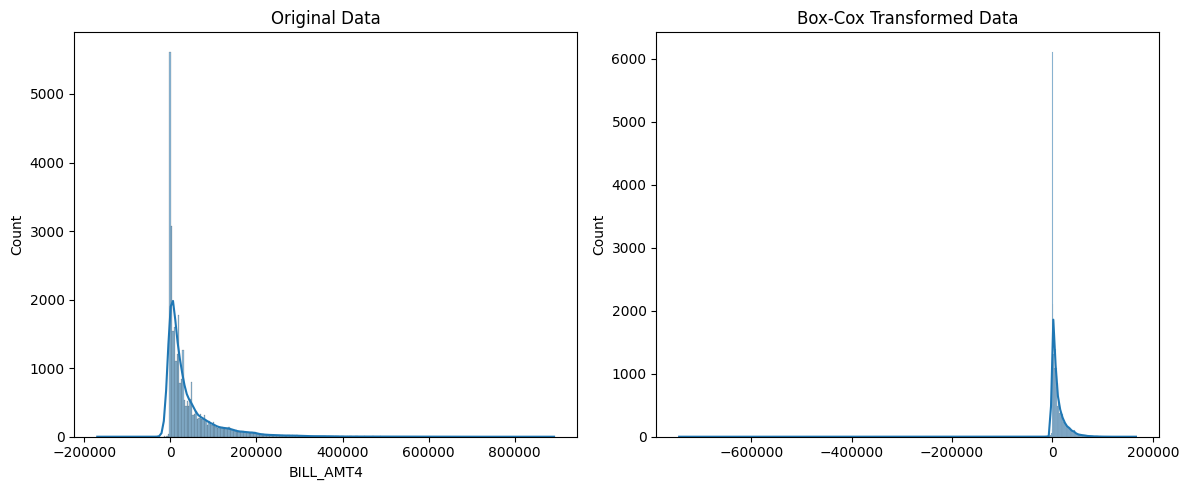

Optimal lambda value: 0.8670957297981772


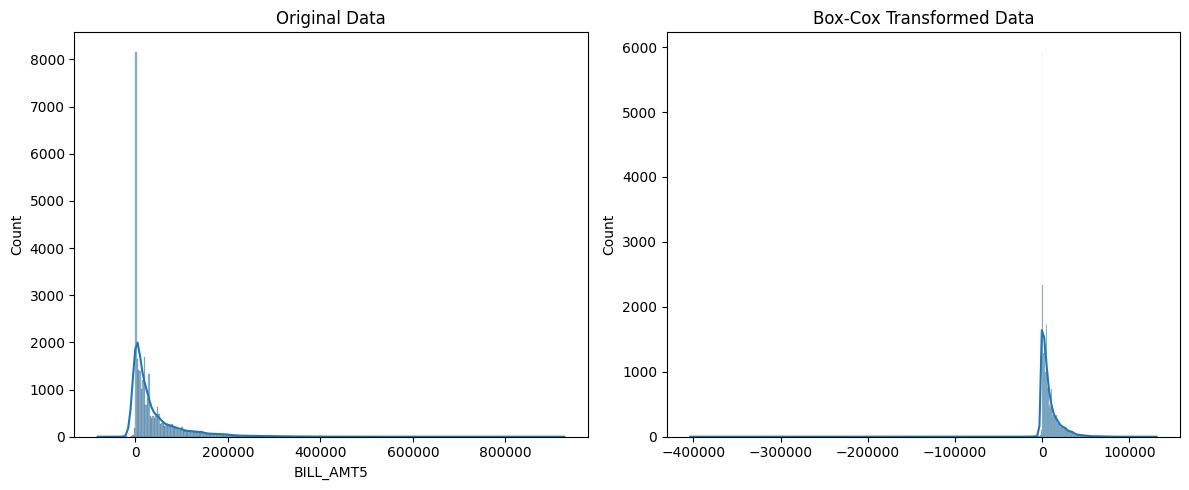

Optimal lambda value: 0.845607858471539


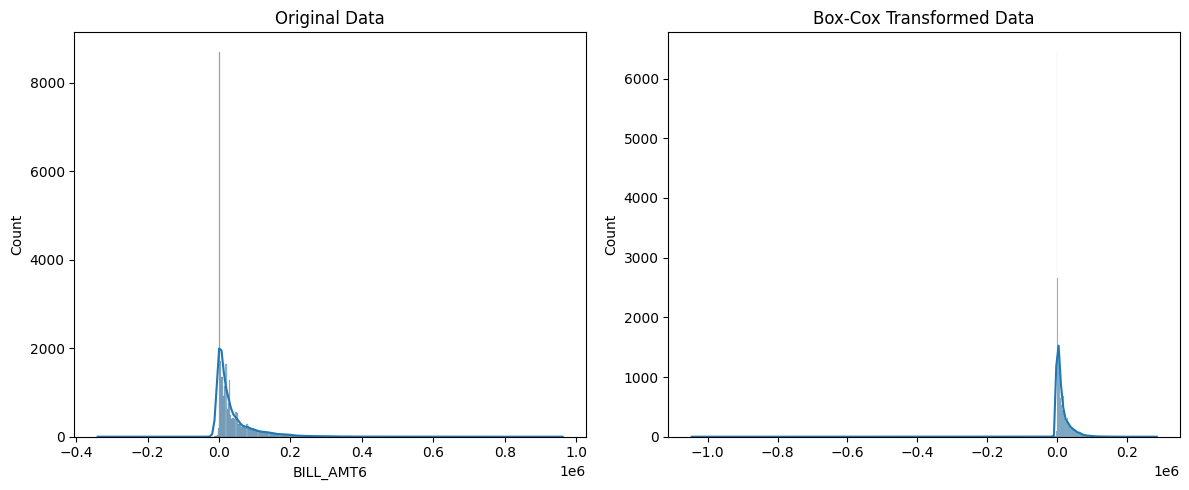

Optimal lambda value: 0.9045438425959752


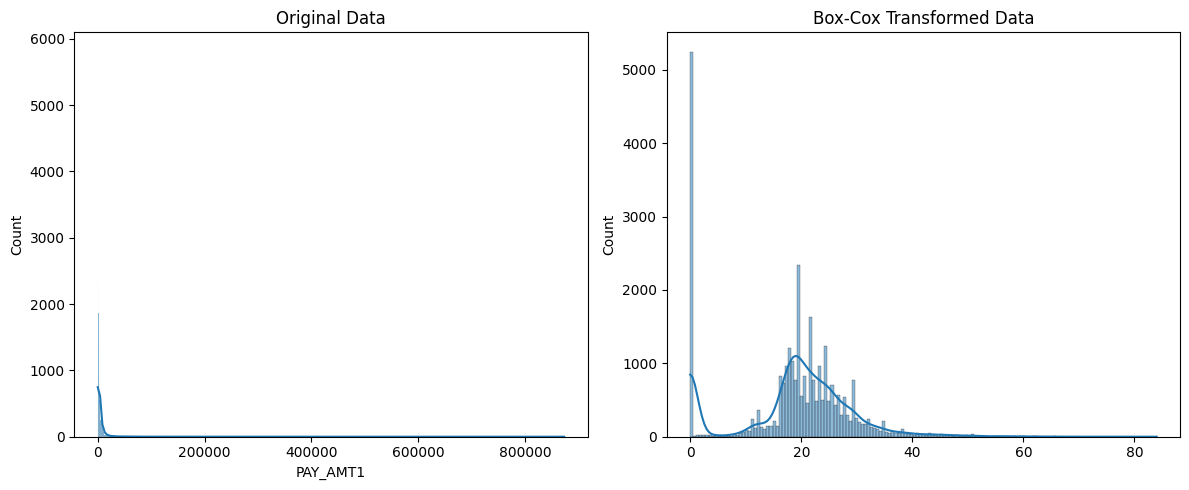

Optimal lambda value: 0.2157017744731905


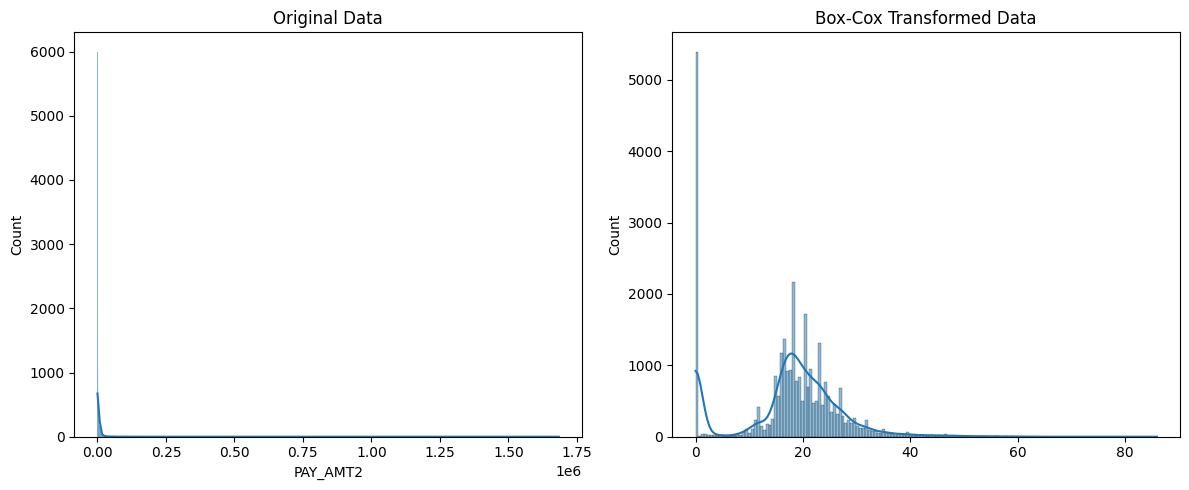

Optimal lambda value: 0.20344044165541494


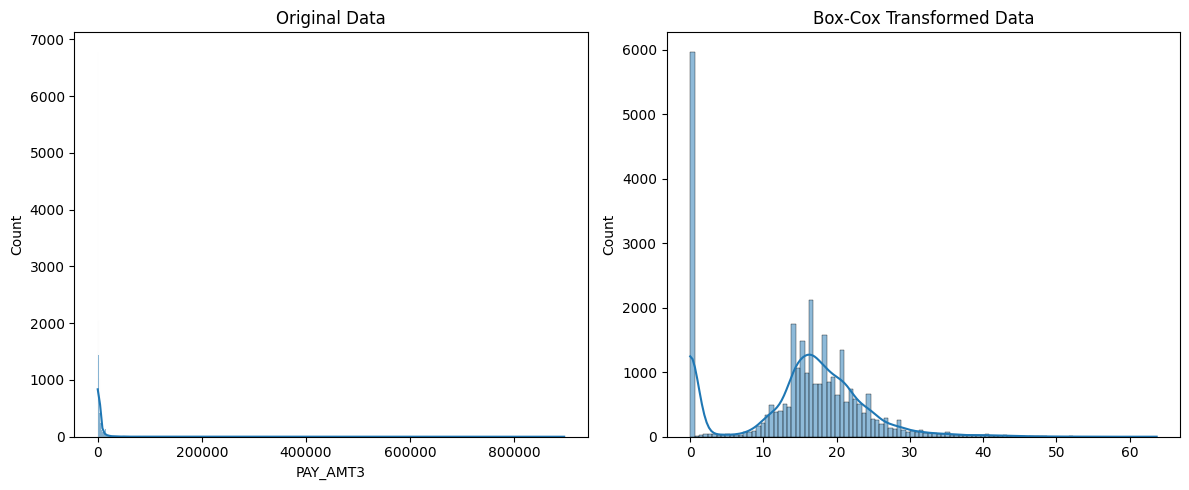

Optimal lambda value: 0.18641240158016167


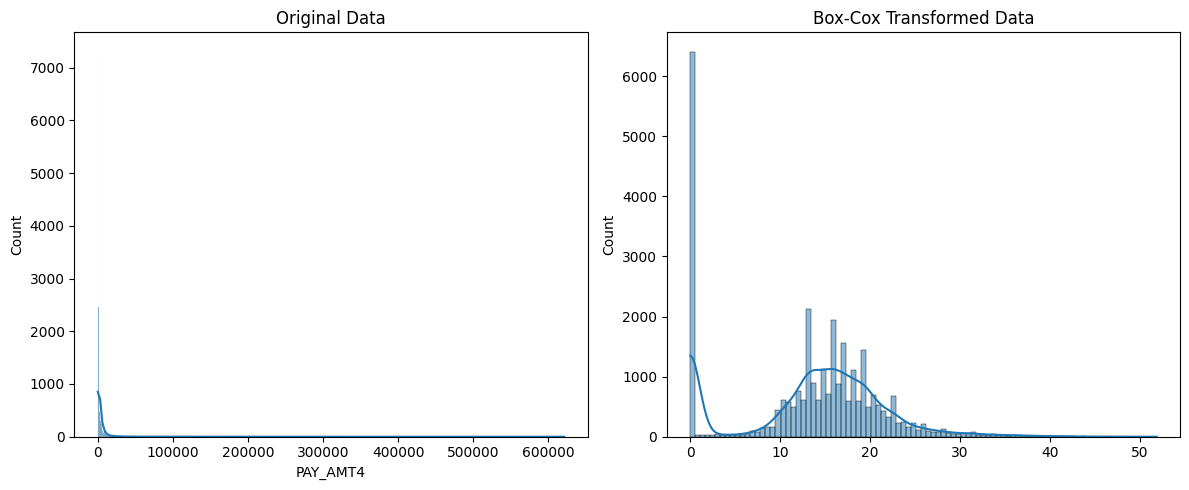

Optimal lambda value: 0.17211002169379036


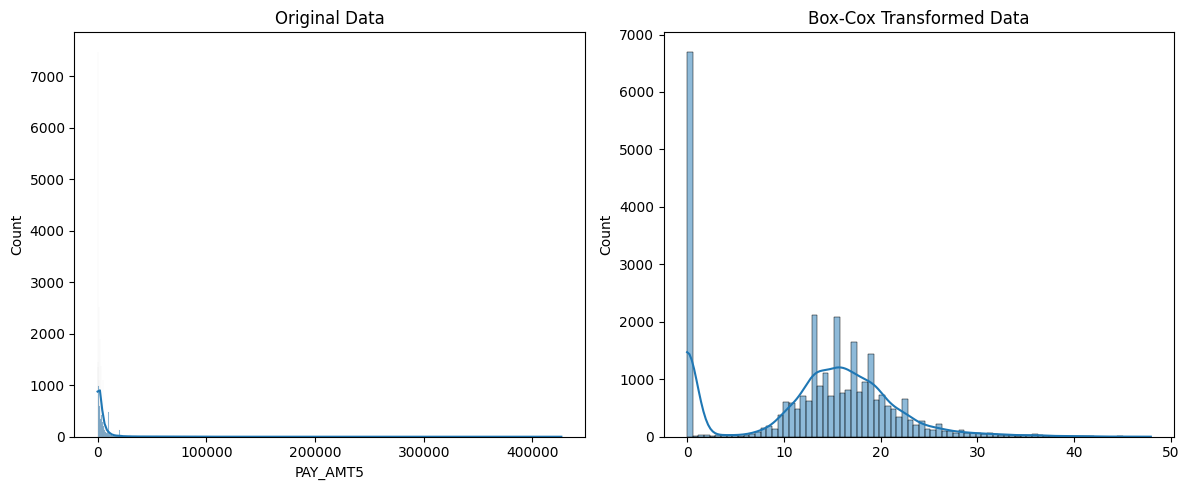

Optimal lambda value: 0.17131160389968106


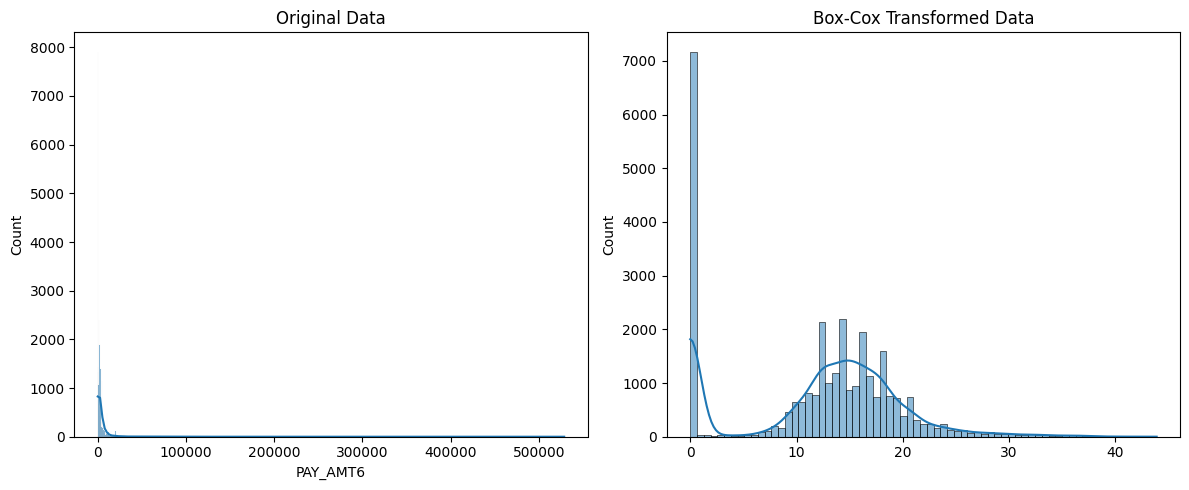

Optimal lambda value: 0.15652989684993202


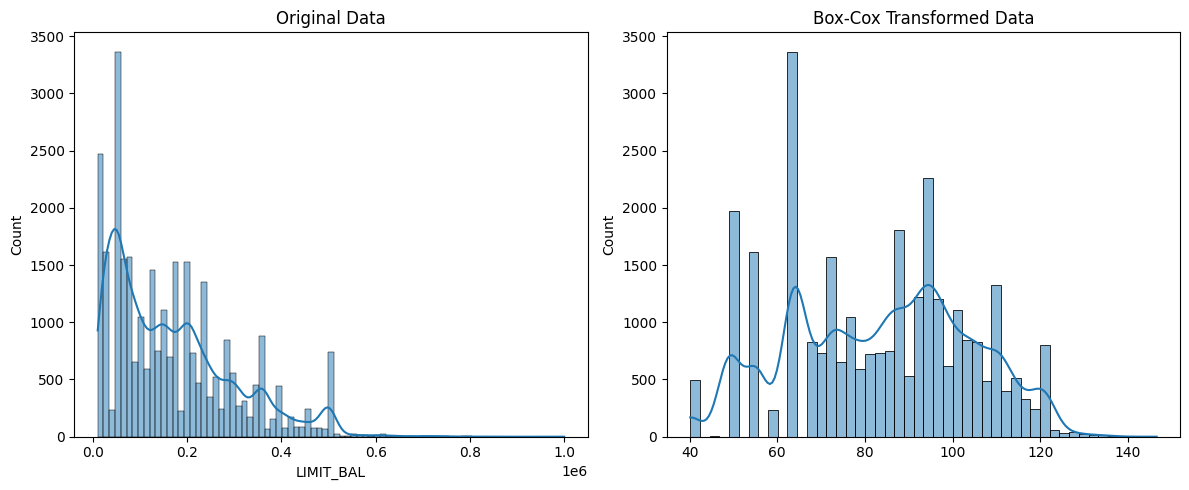

Optimal lambda value: 0.2673494949565067


In [11]:
#As there is presence of negative values in the dataset we use yeo johnson method for transformation 

#Yeo johnson tranformation 
from scipy.stats import yeojohnson 

transformed_final=pd.DataFrame()

for col in x_numericdata1.columns:
    transformed_data,lambda_value=yeojohnson(x_numericdata1[col])
    transformed_final[col] = transformed_data
    
    # Plot the original and transformed data side by side
    plt.figure(figsize=(12, 5))

    # Original data
    plt.subplot(1, 2, 1)
    sns.histplot(x_numericdata1[col], kde=True)
    plt.title('Original Data')

    # Transformed data
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data, kde=True)
    plt.title('Box-Cox Transformed Data')

    plt.tight_layout()
    plt.show()

    # Print the lambda value
    print("Optimal lambda value:", lambda_value)

In [12]:
model_scaling_data=pd.concat([x_categ_Final,transformed_final],axis=1)
model_scaling_data 

scale_instance=RobustScaler()

scaled_data=scale_instance.fit(model_scaling_data) 
scaled_data_final=pd.DataFrame(scaled_data.transform(model_scaling_data),columns=model_scaling_data.columns)
scaled_data_final.describe()




,EDUCATION,encoders__SEX_1,encoders__SEX_2,encoders__MARRIAGE_1,encoders__MARRIAGE_2,encoders__MARRIAGE_3,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.146233,0.396267,-0.396267,0.455300,-0.467867,0.012567,-0.010416,-0.100896,-0.247109,-0.275332,...,0.355886,3.265291e-01,0.370579,-0.109697,-0.119287,-0.161544,-0.166102,-0.167239,-0.171660,-0.049084
std,0.784391,0.489129,0.489129,0.498006,0.498975,0.111396,0.649297,1.010432,1.052556,1.059615,...,1.109204,1.099226e+00,1.171932,1.260690,1.185749,0.964471,0.955283,0.918730,0.797915,0.586155
min,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.409970,-2.127177,-2.175545,-2.172480,...,-54.340636,-3.888039e+01,-56.339173,-2.283684,-2.141410,-1.733601,-1.673580,-1.597657,-1.381140,-1.279361
25%,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-0.531264,-1.000000,-1.000000,-1.000000,...,-0.360425,-3.860456e-01,-0.360709,-0.417720,-0.445750,-0.570638,-0.568787,-0.587413,-0.663965,-0.608220
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-4.329355e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.468736,0.000000,0.000000,0.000000,...,0.639575,6.139544e-01,0.639291,0.582280,0.554250,0.429362,0.431213,0.412587,0.336035,0.391780
max,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.816599,5.257481,4.549788,4.590628,...,11.636134,1.206453e+01,14.872560,7.551953,7.978128,5.025509,4.255769,3.650576,3.047213,1.747947


In [13]:
scaled_data_final.describe()

,EDUCATION,encoders__SEX_1,encoders__SEX_2,encoders__MARRIAGE_1,encoders__MARRIAGE_2,encoders__MARRIAGE_3,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.146233,0.396267,-0.396267,0.455300,-0.467867,0.012567,-0.010416,-0.100896,-0.247109,-0.275332,...,0.355886,3.265291e-01,0.370579,-0.109697,-0.119287,-0.161544,-0.166102,-0.167239,-0.171660,-0.049084
std,0.784391,0.489129,0.489129,0.498006,0.498975,0.111396,0.649297,1.010432,1.052556,1.059615,...,1.109204,1.099226e+00,1.171932,1.260690,1.185749,0.964471,0.955283,0.918730,0.797915,0.586155
min,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.409970,-2.127177,-2.175545,-2.172480,...,-54.340636,-3.888039e+01,-56.339173,-2.283684,-2.141410,-1.733601,-1.673580,-1.597657,-1.381140,-1.279361
25%,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-0.531264,-1.000000,-1.000000,-1.000000,...,-0.360425,-3.860456e-01,-0.360709,-0.417720,-0.445750,-0.570638,-0.568787,-0.587413,-0.663965,-0.608220
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-4.329355e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.468736,0.000000,0.000000,0.000000,...,0.639575,6.139544e-01,0.639291,0.582280,0.554250,0.429362,0.431213,0.412587,0.336035,0.391780
max,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.816599,5.257481,4.549788,4.590628,...,11.636134,1.206453e+01,14.872560,7.551953,7.978128,5.025509,4.255769,3.650576,3.047213,1.747947


In [127]:


#SPLIT THE DATA AS OUTPUT AND INPUT VARIABLES
 # the dataset is an imbalanced dataset so use stratified spliting to split train and testing data on equal proportion of stratify variable like in our case output variable.




In [16]:
#linearity check ---box-tidwell test
# scaled_data_final
import statsmodels.api as sm 
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess

In [17]:
# Assuming 'dependent_variable' is the dependent variable

X=data.drop(['default.payment.next.month'],axis=1)
y=data['default.payment.next.month']



X_with_log = sm.add_constant(np.column_stack((data['LIMIT_BAL'], np.log(data['LIMIT_BAL']))))

# Step 2: Fit logistic regression model
model = sm.Logit(y, X_with_log)
result = model.fit()

result.summary()

#p<0.05,suggests rejects null hypothesis i.e,  not strictly linear; a transformation of the continuous variable may be needed to capture the true relationship better.

Optimization terminated successfully.
         Current function value: 0.513612
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29997
Method:                                   MLE   Df Model:                            2
Date:                        Thu, 16 May 2024   Pseudo R-squ.:                 0.02803
Time:                                15:49:44   Log-Likelihood:                -15408.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                1.071e-193
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0313      0.350      8.667      0.000       2.346       3.717
x1         -6.284e-07   2.71e-07     -2.318      0.020   -1.16e-06   -9.71e-08
x2            -0.3629      0.033    -10.847      0.000      -0.428      -0.297
==============================================================================
"""

steps to follows:


1. PcA/

3.Assumptions

4.sigmoid curve: 

5.maximum likelihood estimation:

6.MODELLING

7. metrics




3. Linearity of the Logit: The relationship between the independent variables and the log-odds (logit) of the dependent variable should be linear. This assumes that changes in the independent variables are associated with a constant change in the log-odds of the dependent variable.


 Multicollinearity occurs when independent variables are highly correlated, making it challenging to isolate the individual effect of each variable on the dependent variable.

check:
a. Variance Inflation Factor (VIF):

Calculate the VIF for each independent variable. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.
A general rule of thumb is that a VIF greater than 10 indicates a problematic level of multicollinearity.

b. Correlation Matrix:

Examine the correlation matrix of independent variables. High correlation coefficients (close to 1 or -1) may indicate multicollinearity.
Consider using techniques like scatterplots or heatmaps to visualize the correlation structure.


   

5. Homoscedasticity of Errors: The variance of the errors should be constant across all levels of the independent variables. This assumption is important for the reliability of statistical tests and confidence intervals associated with the model coefficients.






In [18]:
#split the data in to train and test

x_train,x_test,y_train,y_test=train_test_split(scaled_data_final,y,test_size=0.2,stratify=y,random_state=42)

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [20]:
#BASELINE MODEL
#1
dummy_model=DummyClassifier(strategy='most_frequent')

#This classifier might predict the most frequent class (most common outcome) for all instances. This is known as the "most frequent" or "dummy" classifier.


dummy_model.fit(x_train,y_train)

# predict the model
predict_model=dummy_model.predict(x_test)
accuracy_score(y_test,predict_model) #77%

#mean squared error

mse=mean_squared_error(y_test,predict_model)
print(f"Baseline Mean Squared Error: {mse:.2f}") #0.22



#2
from sklearn.linear_model import LogisticRegression

simple_model = LogisticRegression()
sm1=simple_model.fit(x_train, y_train)
#prediction of model
y_pred = simple_model.predict(x_train)
accuracy_score(y_train,y_pred) #80.46%



#3
# Add a constant to the independent variable
X_with_constant = sm.add_constant(x_train)

logit_model=sm.Logit(y_train,X_with_constant).fit()

logit_model.summary()

logit_model.summary2() #aic--21933 ; # sqr(r)--0.137

#pay2,5--->0.05 ---   significant
#billamt--except 4 > 0.05


y_pred_train=logit_model.predict(X_with_constant)
y_pred_train  # probabilites for each observation

logit_model.summary() #r2--0.1463


fpr,tpr,thresholds=roc_curve(y_train,y_pred_train)
optimal_idx=np.argmax(tpr-fpr)  # 2920 # returns index of maximum value in given array
print(optimal_idx) 

optimal_threshold=thresholds[optimal_idx]
print(optimal_threshold)   #0.26644

auc=metrics.auc(fpr,tpr) #75%
print("Area under the ROC curve : %f" % auc)

#tpr--measures positive instances 
#fpr--proportion of negative instances that are incorrectly classified as positive by model

#print(thresholds)

Baseline Mean Squared Error: 0.22
Optimization terminated successfully.
         Current function value: 0.455900
         Iterations 7
2920
0.2664371788705079
Area under the ROC curve : 0.747886


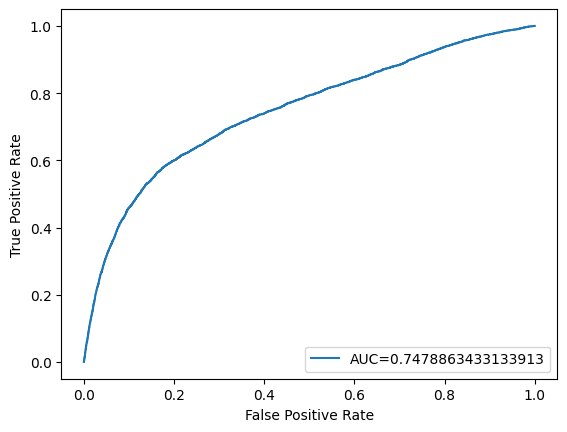

              precision    recall  f1-score   support

           0       0.82      0.87      0.85     17531
           1       0.58      0.48      0.53      6469

    accuracy                           0.77     24000
   macro avg       0.70      0.68      0.69     24000
weighted avg       0.76      0.77      0.76     24000



In [21]:

#plot for roc curve
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()


x_train['pred']=np.where(y_pred_train>optimal_threshold,1,0)

#confusion matrix

confusion_matrix(x_train.pred,y_train)

#classification report
classifcation=classification_report(x_train.pred,y_train)
print(classifcation) #85,53

# it clearly shows the f1score in classifying correctly the defaulters is low 

In [22]:
#VARIATION INFLATION FACTOR-VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

#data.shape[1]

vif=pd.DataFrame()
vif['features']=X_with_constant.columns

vif['vif']=[variance_inflation_factor(X_with_constant.values,i) for i in range(len(X_with_constant.columns)) ]


#VIF ON Fclean_data
#vif1=pd.Series([variance_inflation_factor(X_with_constant.values,i) for i in range(X_with_constant.shape[1])],index= X_with_constant.columns)
vif

#BILL_AMT3,4>9; OTHERS MONTHS ARE MODERATELY #PAY SCALES 2-6 ----MODERATE MULTICOLLINEARITY

#PAY SCALES 2-6 ----MODERATE MULTICOLLINEARITY

c:\users\tippu\OneDrive\creditcard_Default_project\cenv1\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,vif
0,const,3.938247e+00
1,EDUCATION,1.131985e+00
2,encoders__SEX_1,1.227540e+11
3,encoders__SEX_2,1.227540e+11
4,encoders__MARRIAGE_1,8.794952e+08
5,encoders__MARRIAGE_2,1.730789e+11
6,encoders__MARRIAGE_3,inf
7,AGE,1.408828e+00
8,PAY_0,2.036237e+00
9,PAY_2,4.040438e+00


for col in x_numericdata1.columns:

    a=np.mean(data[col])
    b=np.median(data[col])
    print(f'{col}  mean and median :{a},{b}')
    
    
np.mean(np.mean(data.loc[:,'PAY_0':'PAY_6']))  # -0.18; #0.19-median


c=scaled_data_final.cov() # covariance 

eigenvalues,eigenvectors=np.linalg.eig(c)


#index of eigen values in descending order 
idx=eigenvalues.argsort()[::-1]
idx

#sort the eigenvalues in descending order
eigenvalues=eigenvalues[idx]

#sort the corresponding eigenvalues accordingly
eigenvectors=eigenvectors[:,idx]



#explained variance ---amount of total variance which has been retained by selecting the pcs instead of original feature space.

explainec_var=np.cumsum(eigenvalues)/np.sum(eigenvalues)
explainec_var

n_components=np.argmax(explainec_var>=0.5)+1
n_components

u=eigenvectors[:,:n_components]
type(u)


pca_component=pd.DataFrame(u,index=scaled_data_final.columns,columns=['pc1','pc2'])
pca_component



# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

PCA

In [25]:
# pca applying on the dataset

from sklearn.decomposition import PCA
from kneed import KneeLocator

In [26]:
pca1=PCA(n_components=26)
processed1=pca1.fit(scaled_data_final)
df=processed1.transform(scaled_data_final)

#dataframe with principal components
pca_df=pd.DataFrame(df)

# calculate explained variance
explained_variance1=processed1.explained_variance_ratio_
print(explained_variance1)

cumulative_variance1=np.cumsum(explained_variance1)
print(cumulative_variance1)

[3.81984880e-01 1.76970264e-01 8.51205646e-02 4.32542650e-02
 3.54107192e-02 3.42003202e-02 2.81562126e-02 2.52597674e-02
 2.40244727e-02 2.24487516e-02 2.12671647e-02 1.89288658e-02
 1.64870572e-02 1.46471677e-02 1.11100509e-02 1.04392142e-02
 9.12342458e-03 8.36131719e-03 7.99986082e-03 7.64150710e-03
 6.79633056e-03 5.54029859e-03 4.00547487e-03 8.22048256e-04
 5.40645051e-30 7.53332346e-32]
[0.38198488 0.55895514 0.64407571 0.68732997 0.72274069 0.75694101
 0.78509723 0.81035699 0.83438147 0.85683022 0.87809738 0.89702625
 0.91351331 0.92816047 0.93927052 0.94970974 0.95883316 0.96719448
 0.97519434 0.98283585 0.98963218 0.99517248 0.99917795 1.
 1.         1.        ]


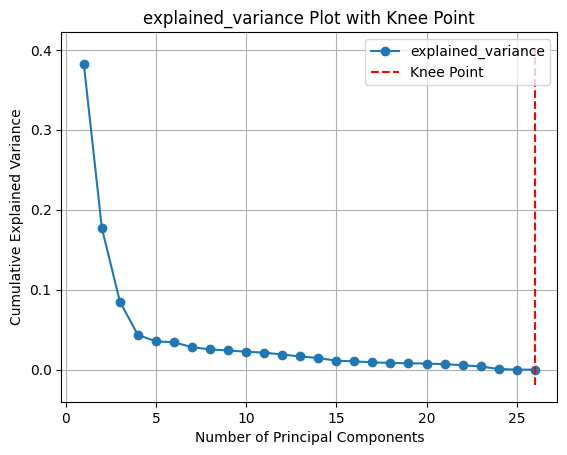

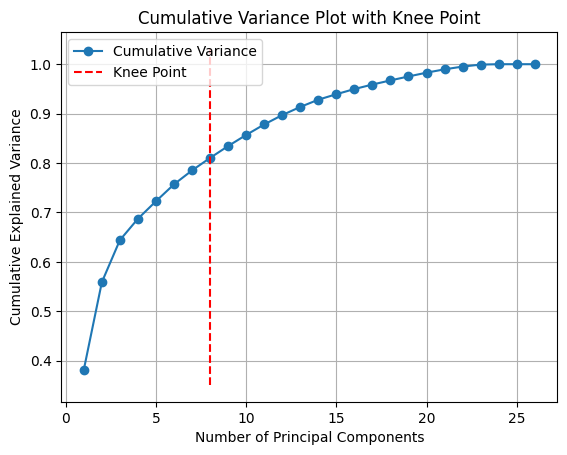

Optimal number of components: 8


In [27]:
# Create scree plot with variance ratio along the pcs
#plt.bar(range(1, len(explained_variance) + 1), explained_variance, align='center', alpha=0.9)
#plt.xlabel('Principal Components')
#plt.ylabel('Explained Variance Ratio')
#plt.title('Scree Plot')
#plt.grid(True)
#plt.show()


knee_locator=KneeLocator(range(1,len(explained_variance1)+1),explained_variance1,curve='concave',direction='decreasing')

knee_point=knee_locator.knee


# Plot cumulative variance with the knee point
plt.plot(range(1, len(explained_variance1) + 1), explained_variance1, marker='o', label='explained_variance')
plt.vlines(knee_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r', label='Knee Point')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('explained_variance Plot with Knee Point')
plt.legend()
plt.grid(True)
plt.show()




# Find the "elbow" point using KneeLocator with cumulative variance 
knee_locator = KneeLocator(range(1, len(cumulative_variance1) + 1), cumulative_variance1, curve='concave', direction='increasing')
knee_point = knee_locator.knee

# Plot cumulative variance with the knee point
plt.plot(range(1, len(cumulative_variance1) + 1), cumulative_variance1, marker='o', label='Cumulative Variance')
plt.vlines(knee_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r', label='Knee Point')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot with Knee Point')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal number of components: {knee_point}")

#np.sum(explained_variance1[:17]) 


pca_df_final=pca_df.iloc[:,:17] #95% of info is retained 
pca_df_final.shape
pca_df_final.sample(10)

In [28]:
#  checking vif on principal componenet variables 
vif1=pd.DataFrame()

vif1['vif_pca']=[variance_inflation_factor(pca_df,i) for i in range(len(pca_df.columns))]

vif1


,vif_pca
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,30.598193
9,34.605124


In [29]:
#split the pca-data in to training and testing 

x_train1,x_test1,y_train1,y_test1=train_test_split(pca_df,y,test_size=0.2,stratify=y,random_state=42)

x_train1.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
6492,-1.609698,-4.617276,0.610717,-0.596811,-0.879918,0.279428,0.012781,1.318046,0.349841,-0.802594,...,0.035729,0.311005,0.080393,-0.115183,0.102615,0.076577,0.186520,-0.036655,-8.064261e-15,8.033888e-16
11006,0.402053,-3.459670,-1.121454,0.601507,1.811165,0.146009,1.203342,-0.574578,-0.379114,0.408580,...,-0.050364,-0.415335,0.345038,-0.036818,-0.036729,0.039758,0.083003,0.008154,1.351284e-14,-5.821003e-16
6379,-0.660323,-3.232210,-0.185449,-1.195154,1.405181,1.081212,0.170950,0.266768,-0.314028,0.283594,...,-0.460530,-0.214739,0.780562,-0.306830,0.325225,0.286510,-0.250734,-0.005116,-8.739841e-15,1.070300e-15
23277,5.434069,1.800879,-2.756112,-0.008416,-0.452235,0.490169,-1.160486,0.394779,0.035386,-0.628808,...,-0.040823,-0.057185,0.022772,0.007922,-0.100395,0.014831,-0.009707,-0.015988,-9.254001e-15,3.175349e-16
14580,-0.991324,-0.099816,0.729416,0.225316,-0.515678,1.568218,-0.020135,0.013335,-0.344060,-0.378162,...,-0.053595,0.062617,-0.019817,0.033361,-0.033895,-0.021200,0.019046,-0.038821,-8.586619e-15,1.031175e-15


1
optimal_threshold :  1.0
Area under the ROC curve : 0.596664


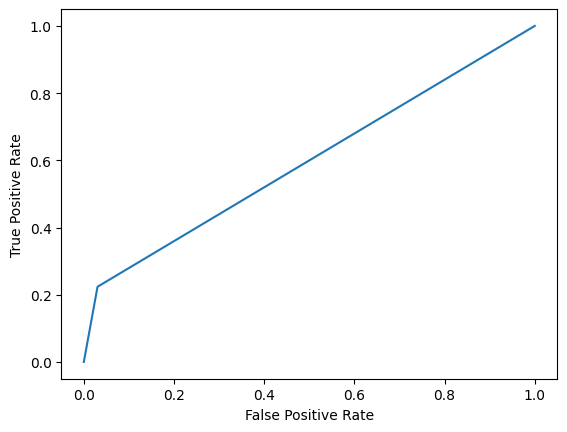

              precision    recall  f1-score   support

           0       0.97      0.81      0.89     22243
           1       0.22      0.68      0.34      1757

    accuracy                           0.80     24000
   macro avg       0.60      0.75      0.61     24000
weighted avg       0.91      0.80      0.85     24000



In [30]:
#modelling the principal components

model1=LogisticRegression()
model_pca=model1.fit(x_train1,y_train1)

#prediction of model
y_pred_pca =model_pca.predict(x_train1)
y_pred_pca




fpr,tpr,thresholds=roc_curve(y_train1,y_pred_pca)
optimal_idx1=np.argmax(tpr-fpr)  
print(optimal_idx1) 

optimal_threshold1=thresholds[optimal_idx1]
print('optimal_threshold : ',optimal_threshold1)   

auc=metrics.auc(fpr,tpr) 
print("Area under the ROC curve : %f" % auc)  #59.7%



#plot for roc curve
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.legend(loc = 4)
plt.show()


a1=pd.DataFrame()

a1['pred']=np.where(y_pred_pca>optimal_threshold,1,0)

#accuracy
accuracy_score(y_train1,a1.pred) #80.45%

#confusion matrix

confusion_matrix(a1.pred,y_train1)



#classification report
classifcation=classification_report(a1.pred,y_train1) 

print(classifcation) 
##f1score------! 0--0.89 ! 1-- 0.34


Optimization terminated successfully.
         Current function value: 0.455900
         Iterations 7
2920
optimal_threshold :  0.26643717887050794
Area under the ROC curve : 0.747886


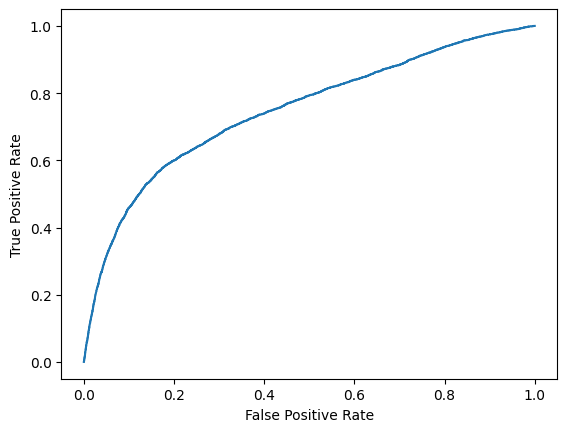

              precision    recall  f1-score   support

           0       0.82      0.87      0.85     17531
           1       0.58      0.48      0.53      6469

    accuracy                           0.77     24000
   macro avg       0.70      0.68      0.69     24000
weighted avg       0.76      0.77      0.76     24000



AttributeError: 'DataFrame' object has no attribute 'pred1'

In [31]:


# Add a constant to the independent variable
X_with_constant1 = sm.add_constant(x_train1)

logit_model1=sm.Logit(y_train1,X_with_constant1).fit()

logit_model1.summary() #r2--0.1388


logit_model1.summary2() #AIC:	21897.1624


y_pred_pca1=logit_model1.predict(X_with_constant1)
y_pred_pca1  # probabilites for each observation


#roc 

fpr1,tpr1,thresholds1=roc_curve(y_train1,y_pred_pca1)
optimal_idx2=np.argmax(tpr1-fpr1)  
print(optimal_idx2) #2999

optimal_threshold2=thresholds1[optimal_idx2]
print('optimal_threshold : ',optimal_threshold2)   #optimal_threshold :  0.2570

auc1=metrics.auc(fpr1,tpr1) 
print("Area under the ROC curve : %f" % auc1)  #74.80



#plot for roc curve
plt.plot(fpr1, tpr1, label = "AUC="+str(auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.legend(loc = 4)
plt.show()


#prediction
a1=pd.DataFrame()
a1['pred1']=np.where(y_pred_pca1>optimal_threshold2,1,0)

#accuracy
accuracy_score(y_train1,a1.pred1) #76.70%

confusion_matrix(a1.pred1,y_train1)

classification2=classification_report(a1.pred1,y_train1)
print(classification2) 

#f1score------! 0--0.84 ! 1-- 0.53



confusion_matrix(x_train1.pred1,y_train1)

In [ ]:

from sklearn.model_selection import GridSearchCV



In [32]:
X_with_constant1.drop(['pred','pred1'],axis=1,inplace=True)
X_with_constant1.shape
a=sm.add_constant(x_test1)
y_pred2=logit_model1.predict(a)

KeyError: "['pred', 'pred1'] not found in axis"

(24000, 27)

1. firstly,perform PCA on your data, and obtain the eigenvalues and eigenvectors.

# The eigenvalues represent the amount of variance explained by each principal component.

2. Calculate the proportion of variance explained by each principal component by dividing each eigenvalue by the sum of all eigenvalues.

3.Plot the cumulative explained variance against the number of principal components. 

# The x-axis represents the number of components, and the y-axis represents the cumulative explained variance. This plot helps you visualize how much of the total variance is captured by the first N principal components.The "elbow" is often considered a good point to determine the number of components to retain.

4.Look for the point on the plot where adding more components provides diminishing returns in terms of explained variance. 

# It's a trade-off between capturing enough variance to represent the data well and avoiding overfitting.





the scree plot displays the explained variance against each principal component.the idea is to look for an "elbow" point on the plot where adding more components does not significantly increase the explained variance.



TPR= True Positives/(True Positives + False Negatives)



The False Positive Rate (FPR), also known as the fall-out,it is expressed as:

FPR=False Positives/False Positives + True Negatives

The difference between the True Positive Rate and False Positive Rate, often referred to as the "sensitivity minus specificity" or "recall minus fall-out," can be expressed as:

TPR - FPR=True Positives/True Positives + False Negatives

-False Positives/False Positives + True Negatives



This difference can be useful in evaluating a model's performance, 
especially in the context of (ROC) curves. as plotting TPR against FPR at various threshold settings allows you
to assess the trade-off between correctly identifying positive instances and incorrectly
classifying negative instances as positive. The TPR - FPR difference at different points
on the ROC curve provides insights into the model's performance characteristics at diffe
rent operating points.